## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.088438  0.979002 -1.763814  0.918708 -0.918287  1.870976
1  1.650077 -1.590957  0.362289  1.053896  1.151309 -0.305779
2 -0.251499  1.376046 -0.360889  0.273437  0.483486  0.937592
3 -0.525357 -0.479019  0.600547  1.270849  1.242471  0.778292
4  1.075189 -1.322508 -0.579246 -0.122750  0.605808 -0.745141


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9842771	total: 57.1ms	remaining: 57.1s
1:	learn: 0.9743160	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9651865	total: 58.2ms	remaining: 19.3s
3:	learn: 0.9545526	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9454241	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9360302	total: 59.8ms	remaining: 9.9s
6:	learn: 0.9262582	total: 60.2ms	remaining: 8.54s
7:	learn: 0.9158271	total: 60.7ms	remaining: 7.53s
8:	learn: 0.9071947	total: 61.2ms	remaining: 6.74s
9:	learn: 0.8987990	total: 61.8ms	remaining: 6.11s
10:	learn: 0.8883524	total: 62.3ms	remaining: 5.6s
11:	learn: 0.8792464	total: 62.9ms	remaining: 5.18s
12:	learn: 0.8703370	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8638615	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8567147	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8500920	total: 65.1ms	remaining: 4s
16:	learn: 0.8434298	total: 65.7ms	remaining: 3.8s
17:	learn: 0.8350088	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8280516	total: 66.8ms	remaining: 3.45s

62:	learn: 0.5628986	total: 87.4ms	remaining: 1.3s
63:	learn: 0.5587884	total: 87.9ms	remaining: 1.28s
64:	learn: 0.5535646	total: 88.3ms	remaining: 1.27s
65:	learn: 0.5495347	total: 88.8ms	remaining: 1.26s
66:	learn: 0.5441834	total: 89.2ms	remaining: 1.24s
67:	learn: 0.5399317	total: 89.7ms	remaining: 1.23s
68:	learn: 0.5361744	total: 90.1ms	remaining: 1.22s
69:	learn: 0.5308536	total: 90.6ms	remaining: 1.2s
70:	learn: 0.5268678	total: 91.2ms	remaining: 1.19s
71:	learn: 0.5223731	total: 91.7ms	remaining: 1.18s
72:	learn: 0.5192625	total: 92.2ms	remaining: 1.17s
73:	learn: 0.5149507	total: 92.7ms	remaining: 1.16s
74:	learn: 0.5108472	total: 93.3ms	remaining: 1.15s
75:	learn: 0.5070317	total: 93.8ms	remaining: 1.14s
76:	learn: 0.5038431	total: 94.3ms	remaining: 1.13s
77:	learn: 0.4994685	total: 94.9ms	remaining: 1.12s
78:	learn: 0.4958181	total: 95.3ms	remaining: 1.11s
79:	learn: 0.4918999	total: 95.8ms	remaining: 1.1s
80:	learn: 0.4876746	total: 96.5ms	remaining: 1.09s
81:	learn: 0.48

266:	learn: 0.1472640	total: 187ms	remaining: 512ms
267:	learn: 0.1464783	total: 187ms	remaining: 511ms
268:	learn: 0.1456745	total: 188ms	remaining: 512ms
269:	learn: 0.1449046	total: 189ms	remaining: 511ms
270:	learn: 0.1441432	total: 189ms	remaining: 509ms
271:	learn: 0.1433590	total: 190ms	remaining: 508ms
272:	learn: 0.1426905	total: 190ms	remaining: 507ms
273:	learn: 0.1419691	total: 191ms	remaining: 506ms
274:	learn: 0.1409866	total: 191ms	remaining: 504ms
275:	learn: 0.1401306	total: 192ms	remaining: 503ms
276:	learn: 0.1394431	total: 192ms	remaining: 501ms
277:	learn: 0.1387739	total: 193ms	remaining: 500ms
278:	learn: 0.1378578	total: 193ms	remaining: 499ms
279:	learn: 0.1371342	total: 194ms	remaining: 498ms
280:	learn: 0.1364900	total: 194ms	remaining: 497ms
281:	learn: 0.1356664	total: 195ms	remaining: 495ms
282:	learn: 0.1349824	total: 195ms	remaining: 494ms
283:	learn: 0.1340168	total: 196ms	remaining: 493ms
284:	learn: 0.1332557	total: 196ms	remaining: 492ms
285:	learn: 

437:	learn: 0.0604989	total: 271ms	remaining: 347ms
438:	learn: 0.0602828	total: 271ms	remaining: 347ms
439:	learn: 0.0600295	total: 272ms	remaining: 346ms
440:	learn: 0.0597882	total: 272ms	remaining: 345ms
441:	learn: 0.0594459	total: 272ms	remaining: 344ms
442:	learn: 0.0592014	total: 273ms	remaining: 343ms
443:	learn: 0.0589751	total: 273ms	remaining: 342ms
444:	learn: 0.0587589	total: 274ms	remaining: 342ms
445:	learn: 0.0584296	total: 274ms	remaining: 341ms
446:	learn: 0.0581937	total: 275ms	remaining: 340ms
447:	learn: 0.0579847	total: 275ms	remaining: 339ms
448:	learn: 0.0577781	total: 276ms	remaining: 338ms
449:	learn: 0.0574616	total: 276ms	remaining: 337ms
450:	learn: 0.0572346	total: 276ms	remaining: 336ms
451:	learn: 0.0570194	total: 277ms	remaining: 336ms
452:	learn: 0.0567860	total: 277ms	remaining: 335ms
453:	learn: 0.0565672	total: 278ms	remaining: 334ms
454:	learn: 0.0563132	total: 278ms	remaining: 333ms
455:	learn: 0.0561121	total: 279ms	remaining: 332ms
456:	learn: 

650:	learn: 0.0248001	total: 370ms	remaining: 198ms
651:	learn: 0.0246976	total: 371ms	remaining: 198ms
652:	learn: 0.0245942	total: 371ms	remaining: 197ms
653:	learn: 0.0244951	total: 372ms	remaining: 197ms
654:	learn: 0.0244371	total: 372ms	remaining: 196ms
655:	learn: 0.0244014	total: 373ms	remaining: 195ms
656:	learn: 0.0242645	total: 373ms	remaining: 195ms
657:	learn: 0.0242295	total: 373ms	remaining: 194ms
658:	learn: 0.0240949	total: 374ms	remaining: 193ms
659:	learn: 0.0240606	total: 374ms	remaining: 193ms
660:	learn: 0.0239297	total: 375ms	remaining: 192ms
661:	learn: 0.0238253	total: 375ms	remaining: 191ms
662:	learn: 0.0236931	total: 375ms	remaining: 191ms
663:	learn: 0.0236099	total: 376ms	remaining: 190ms
664:	learn: 0.0234808	total: 376ms	remaining: 190ms
665:	learn: 0.0233802	total: 377ms	remaining: 189ms
666:	learn: 0.0233392	total: 377ms	remaining: 188ms
667:	learn: 0.0232992	total: 378ms	remaining: 188ms
668:	learn: 0.0231749	total: 378ms	remaining: 187ms
669:	learn: 

829:	learn: 0.0134735	total: 454ms	remaining: 92.9ms
830:	learn: 0.0134665	total: 454ms	remaining: 92.4ms
831:	learn: 0.0134340	total: 455ms	remaining: 91.8ms
832:	learn: 0.0134271	total: 455ms	remaining: 91.2ms
833:	learn: 0.0134107	total: 455ms	remaining: 90.6ms
834:	learn: 0.0133945	total: 456ms	remaining: 90.1ms
835:	learn: 0.0133347	total: 456ms	remaining: 89.5ms
836:	learn: 0.0132820	total: 457ms	remaining: 89ms
837:	learn: 0.0132506	total: 457ms	remaining: 88.4ms
838:	learn: 0.0132238	total: 458ms	remaining: 87.8ms
839:	learn: 0.0132077	total: 458ms	remaining: 87.2ms
840:	learn: 0.0131919	total: 458ms	remaining: 86.7ms
841:	learn: 0.0131336	total: 459ms	remaining: 86.1ms
842:	learn: 0.0130713	total: 459ms	remaining: 85.5ms
843:	learn: 0.0130554	total: 460ms	remaining: 85ms
844:	learn: 0.0130398	total: 460ms	remaining: 84.4ms
845:	learn: 0.0129725	total: 461ms	remaining: 83.9ms
846:	learn: 0.0129257	total: 461ms	remaining: 83.3ms
847:	learn: 0.0128800	total: 462ms	remaining: 82.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

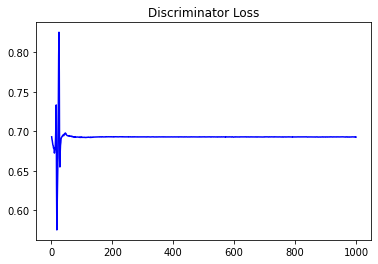

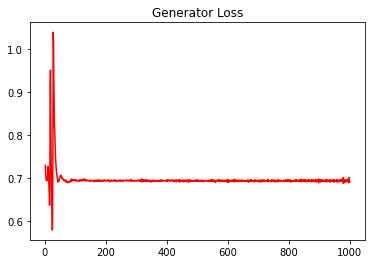

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07529625071110654


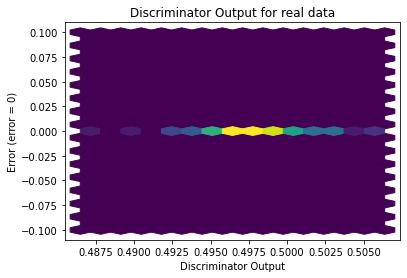

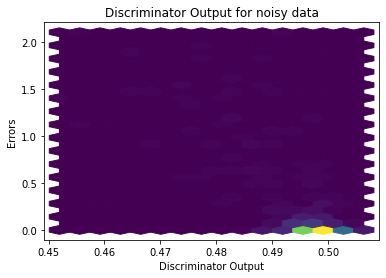

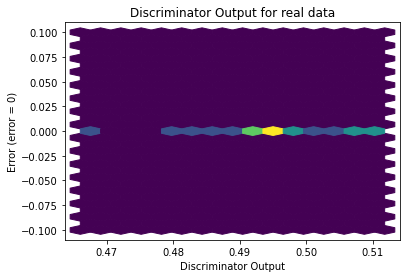

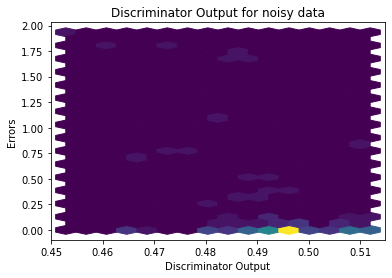

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


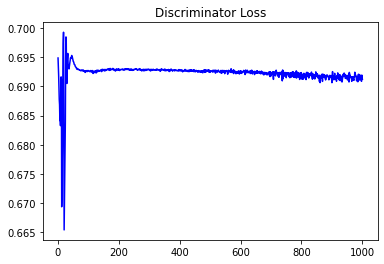

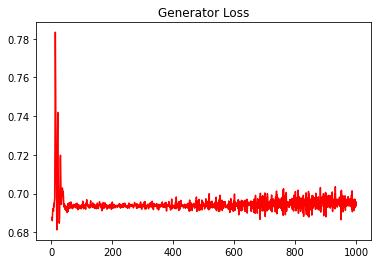

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09219957194968163


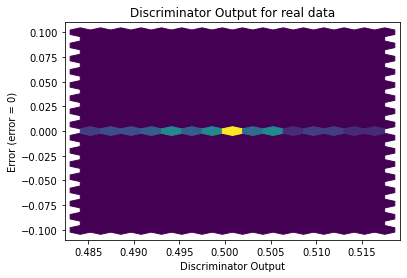

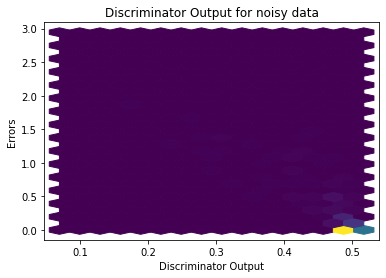

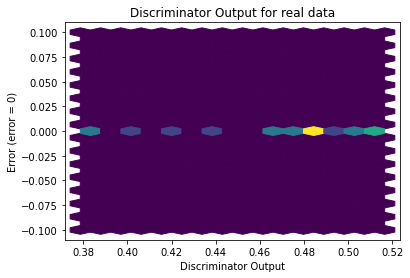

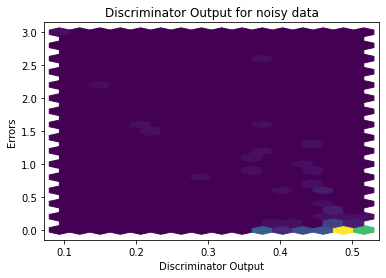

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5687]], requires_grad=True)
